In [1]:
# Load the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_excel("data/raw/train.xlsx")
train_df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [2]:
test_df  = pd.read_excel("data/raw/test.xlsx")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5404 non-null   int64  
 1   date           5404 non-null   object 
 2   bedrooms       5404 non-null   int64  
 3   bathrooms      5404 non-null   float64
 4   sqft_living    5404 non-null   int64  
 5   sqft_lot       5404 non-null   int64  
 6   floors         5404 non-null   float64
 7   waterfront     5404 non-null   int64  
 8   view           5404 non-null   int64  
 9   condition      5404 non-null   int64  
 10  grade          5404 non-null   int64  
 11  sqft_above     5404 non-null   int64  
 12  sqft_basement  5404 non-null   int64  
 13  yr_built       5404 non-null   int64  
 14  yr_renovated   5404 non-null   int64  
 15  zipcode        5404 non-null   int64  
 16  lat            5404 non-null   float64
 17  long           5404 non-null   float64
 18  sqft_liv

In [3]:
# Drop Columns You Should NOT Use
drop_cols = ["date", "zipcode"]
train_df = train_df.drop(columns=drop_cols)
test_df  = test_df.drop(columns=drop_cols)


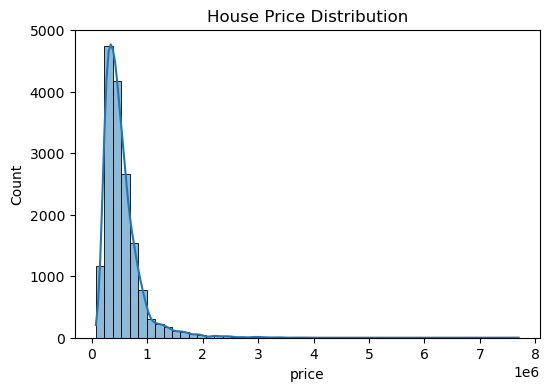

In [4]:
# Outlier Analysis
plt.figure(figsize=(6,4))
sns.histplot(train_df["price"], bins=50, kde=True)
plt.title("House Price Distribution")
plt.show()

In [5]:
# Remove Extreme Outliers
upper_price = train_df["price"].quantile(0.99)
df = train_df[train_df["price"] < upper_price]


In [6]:
# Log Transform the Target
train_df["log_price"] = np.log1p(train_df["price"])

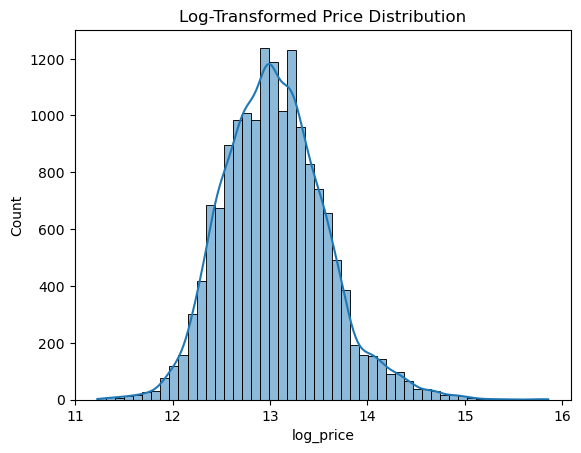

In [7]:
sns.histplot(train_df["log_price"], bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.show()

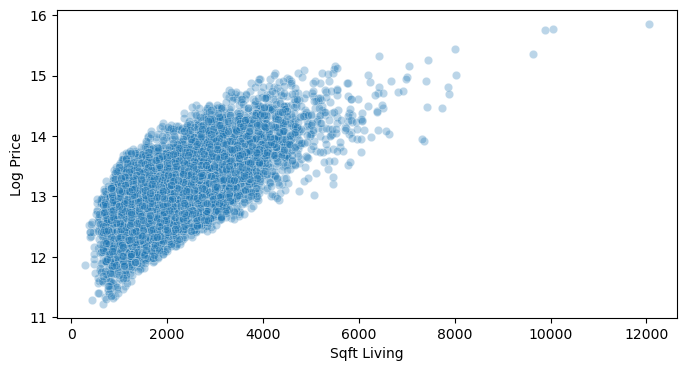

In [8]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=train_df["sqft_living"], y=train_df["log_price"], alpha=0.3)
plt.xlabel("Sqft Living")
plt.ylabel("Log Price")
plt.show()

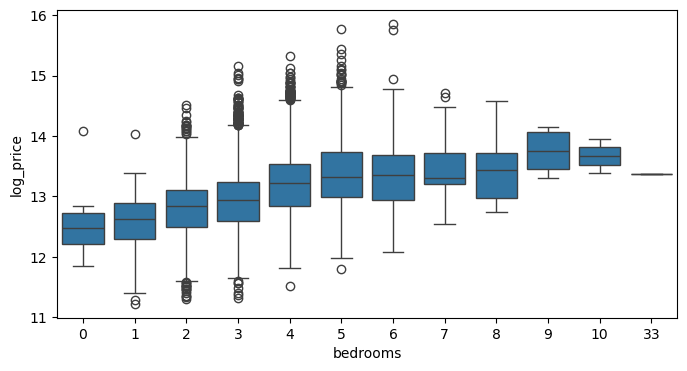

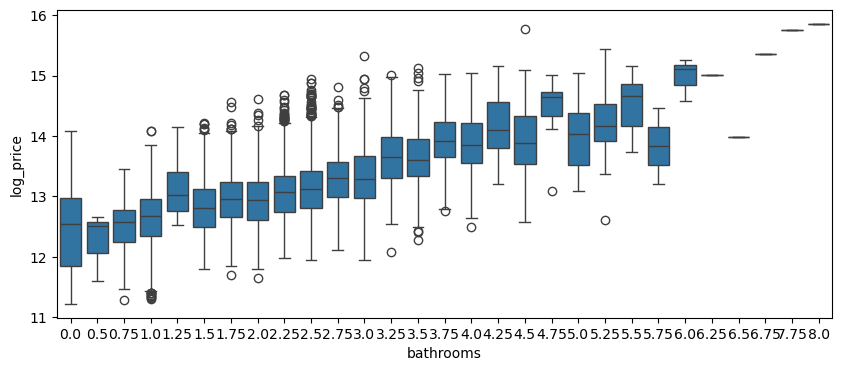

In [9]:
# Bedrooms & Bathrooms
plt.figure(figsize=(8,4))
sns.boxplot(x=train_df["bedrooms"], y=train_df["log_price"])
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x=train_df["bathrooms"], y=train_df["log_price"])
plt.show()

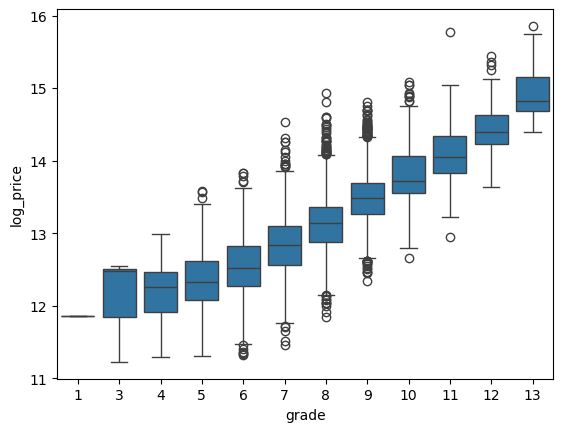

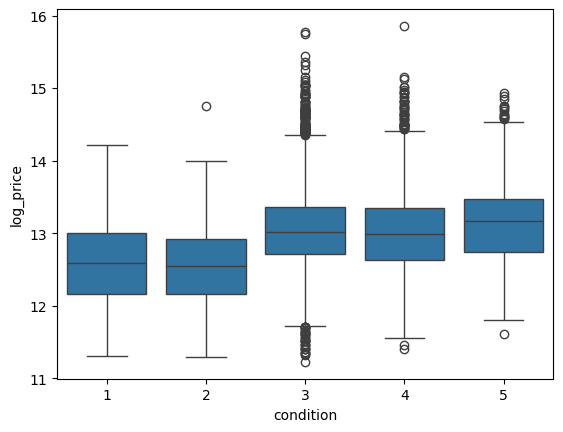

In [10]:
# Grade & Condition
sns.boxplot(x=train_df["grade"], y=train_df["log_price"])
plt.show()

sns.boxplot(x=train_df["condition"], y=train_df["log_price"])
plt.show()

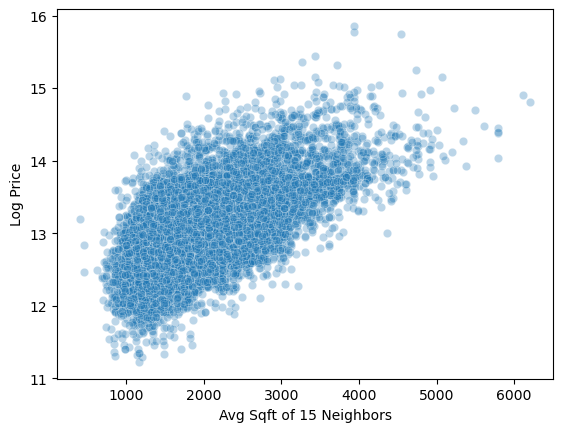

In [11]:
# Neighborhood Density Features
sns.scatterplot(x=train_df["sqft_living15"], y=train_df["log_price"], alpha=0.3)
plt.xlabel("Avg Sqft of 15 Neighbors")
plt.ylabel("Log Price")
plt.show()


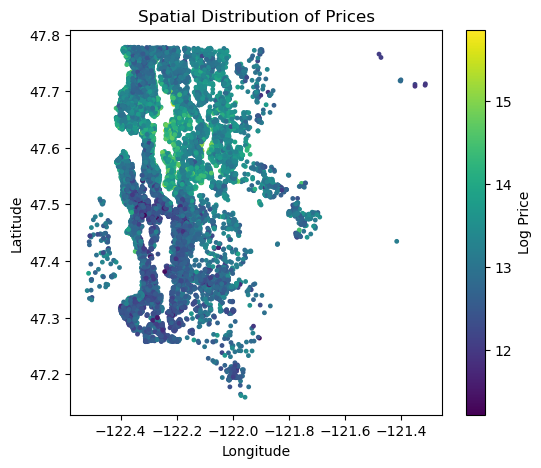

In [12]:
# Geospatial Visualization
plt.figure(figsize=(6,5))
plt.scatter(
    train_df["long"], train_df["lat"],
    c=train_df["log_price"], cmap="viridis", s=6
)
plt.colorbar(label="Log Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Prices")
plt.show()

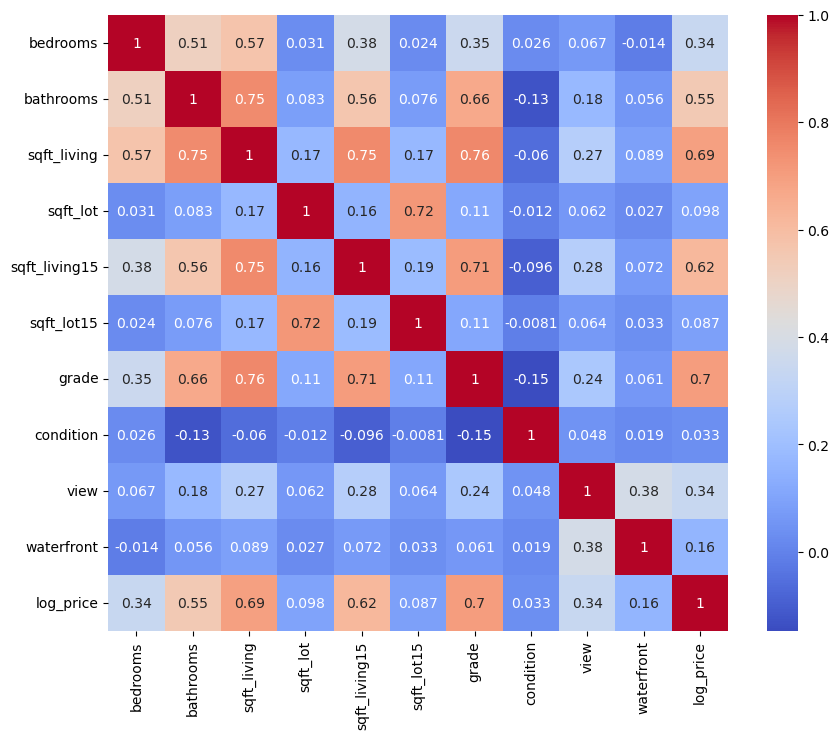

In [13]:
# Correlation Heatmap
features_for_corr = [
    "bedrooms", "bathrooms", "sqft_living",
    "sqft_lot", "sqft_living15", "sqft_lot15",
    "grade", "condition", "view", "waterfront",
    "log_price"
]

plt.figure(figsize=(10,8))
sns.heatmap(train_df[features_for_corr].corr(), annot=True, cmap="coolwarm")
plt.show()

In [15]:
# Save Cleaned Dataset
train_df.to_csv("data/processed/train_clean.csv", index=False)
test_df.to_csv("data/processed/test_clean.csv", index=False)


<h>---------------------------------------------------------------------------------------------------------</h>

In [ ]:
# Load Images & Basic Transforms
from torchvision import transforms
from PIL import Image

image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

def load_image(idx):
    img_path = f"data/images/sentinel/{idx}.png"
    img = Image.open(img_path).convert("RGB")
    return image_transform(img)


In [ ]:
import os

image_dir = "data/images/sentinel"

available_image_ids = set(
    int(f.replace(".png", "")) 
    for f in os.listdir(image_dir) 
    if f.endswith(".png") 
)
df_with_images = train_df.loc[train_df.index.isin(available_image_ids)] /
# .loc[...] → selects only those rows


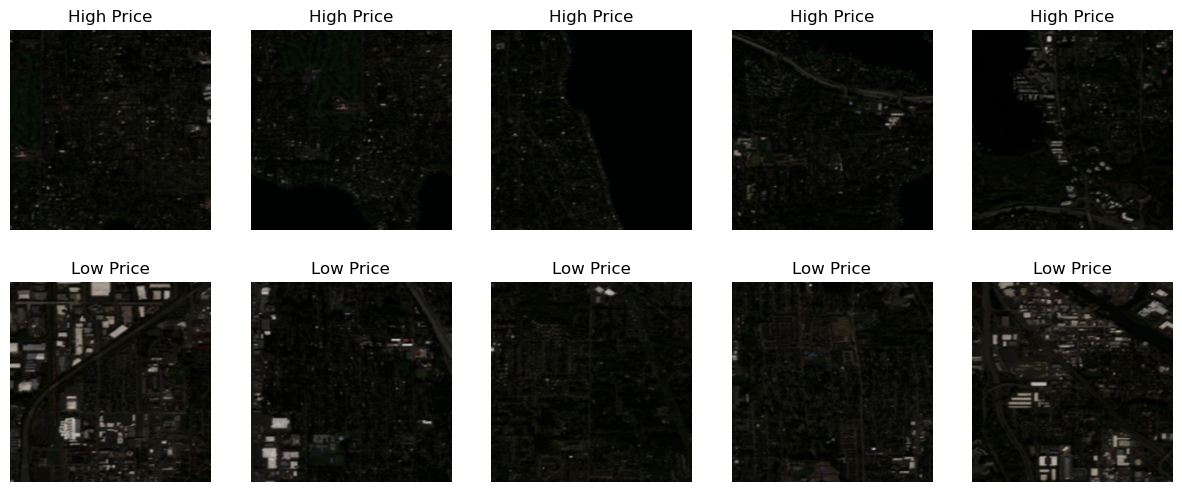

In [ ]:
# Visual EDA — High vs Low Price Areas

# high_price_idx = train_df.sort_values("price", ascending=False).index[:5]
# low_price_idx = train_df.sort_values("price").index[:5]

high_price_idx = df_with_images.sort_values("price", ascending=False).index[:5]
low_price_idx = df_with_images.sort_values("price").index[:5]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# 2 x 5 grids 

for i, idx in enumerate(high_price_idx):
    axes[0, i].imshow(Image.open(f"data/images/sentinel/{idx}.png"))
    axes[0, i].set_title("High Price")
    axes[0, i].axis("off")

for i, idx in enumerate(low_price_idx):
    axes[1, i].imshow(Image.open(f"data/images/sentinel/{idx}.png"))
    axes[1, i].set_title("Low Price")
    axes[1, i].axis("off")

plt.show()


In [21]:
# Data Augmentation
train_image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [22]:
# Sanity check Image Tensor
img_tensor = load_image(0)
img_tensor.shape


torch.Size([3, 224, 224])